# Pyber Challenge

### Loading and Reading CSV files

In [96]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [97]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Get a Summary DataFrame 

In [98]:
# Get the total rides for each city type
total_ride_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [99]:
# Get the total drivers for each city type
total_driver_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_type.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [100]:
# Get the total amount of fares for each city type
total_fare_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [101]:
# Get the average fare per ride for each city type. 
average_fare_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [102]:
# Get the average fare per driver for each city type. 
average_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [103]:
#  Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame(
          {"Total Rides": total_ride_type, 
          "Total Drivers": total_driver_type, 
          "Total Fares": total_fare_type,
          "Average Fare Per Ride": average_fare_per_ride, 
          "Average Fare Per Driver": average_fare_per_driver})

PyBer_summary_df.head()



,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [104]:
# Cleaning up the DataFrame and delete the index name
PyBer_summary_df.index.name = None
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [105]:
# Format the "Total Fares", "Average Fare Per Ride" and "Average Fare Per Driver".
PyBer_summary_df["Total Rides"] = PyBer_summary_df["Total Rides"].map("{:,.0f}".format)
PyBer_summary_df["Total Drivers"] = PyBer_summary_df["Total Drivers"].map("{:,.0f}".format)
PyBer_summary_df["Total Fares"] = PyBer_summary_df["Total Fares"].map("${:,.2f}".format)
PyBer_summary_df["Average Fare Per Ride"] = PyBer_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
PyBer_summary_df["Average Fare Per Driver"] = PyBer_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

# Display the data frame
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [106]:
# Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [107]:
# Split up the data into groups based upon city 'type' and 'date'
# And, find out the sum of the fares for each date
sum_fare_type_date = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
sum_fare_type_date.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [108]:
# Reset the index on the DataFrame 
sum_fare_type_date = sum_fare_type_date.reset_index()
sum_fare_type_date.head()


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [109]:
# Create a pivot table with the 'date' as the index,the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
pyber_data_pivot = sum_fare_type_date.pivot(index="date", columns = "type", values="fare")
pyber_data_pivot.head(10) 

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [110]:
# Create a new DataFrame from the pivot table DataFrame by filtering for the given dates, '2015-01-01':'2015-12-31'.
pyber_Jan_Apr = pyber_data_pivot.loc['2019-01-01':'2019-04-29']
pyber_Jan_Apr.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [111]:
# Change the "date" index to datetime datatype. 
pyber_Jan_Apr.index = pd.to_datetime(pyber_Jan_Apr.index)

In [112]:
# Check that the datatype for the index is datetime
pyber_Jan_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [113]:
# Resample the DataFrame by the week, and get sum of the fares for each week. 
pyber_week_df = pyber_Jan_Apr.resample("W").sum()
pyber_week_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


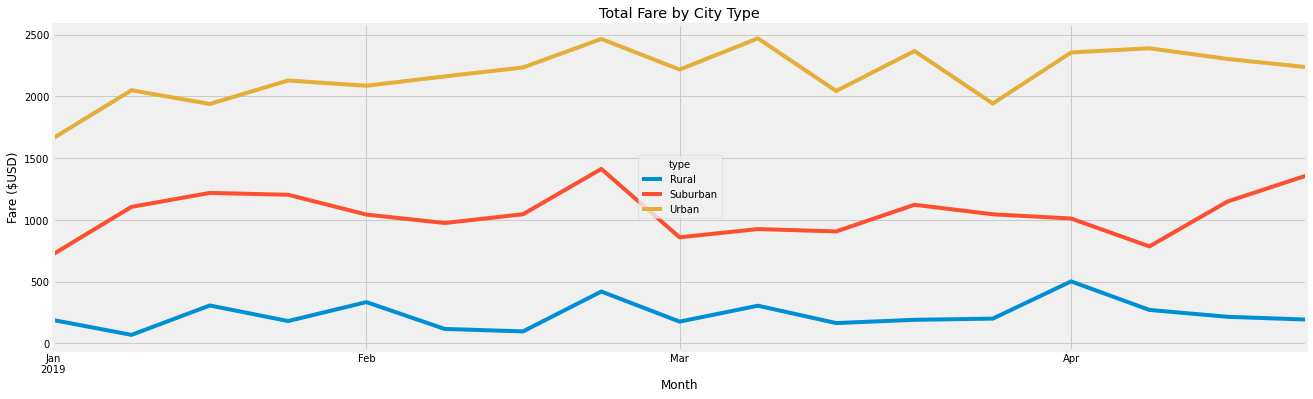

<Figure size 432x288 with 0 Axes>

In [114]:
# Plot the resampled DataFrame, using the object-oriented interface method
ax = pyber_week_df.plot(figsize = (20,6))

# Add a title 
ax.set_title("Total Fare by City Type")

# Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure named "PyBer_fare_summary.png"
plt.savefig("PyBer_fare_summary.png")
plt.show()
plt.tight_layout()




